In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("diabetes.csv")
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<Axes: >

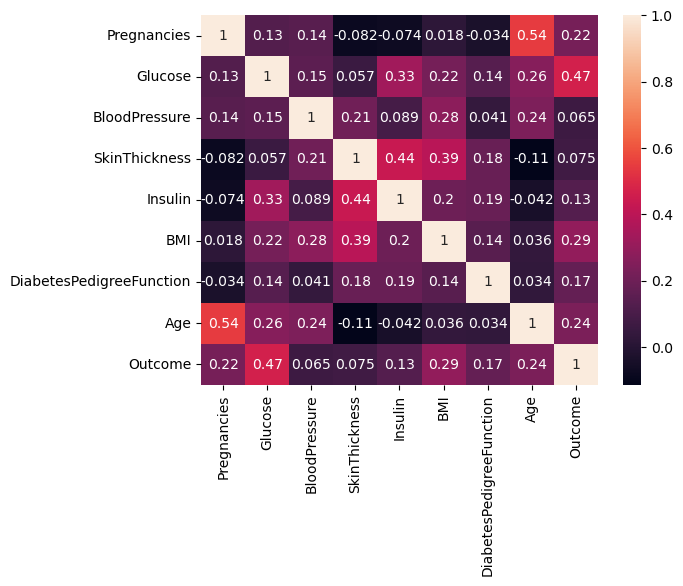

In [5]:
sns.heatmap(data.corr(),annot=True)

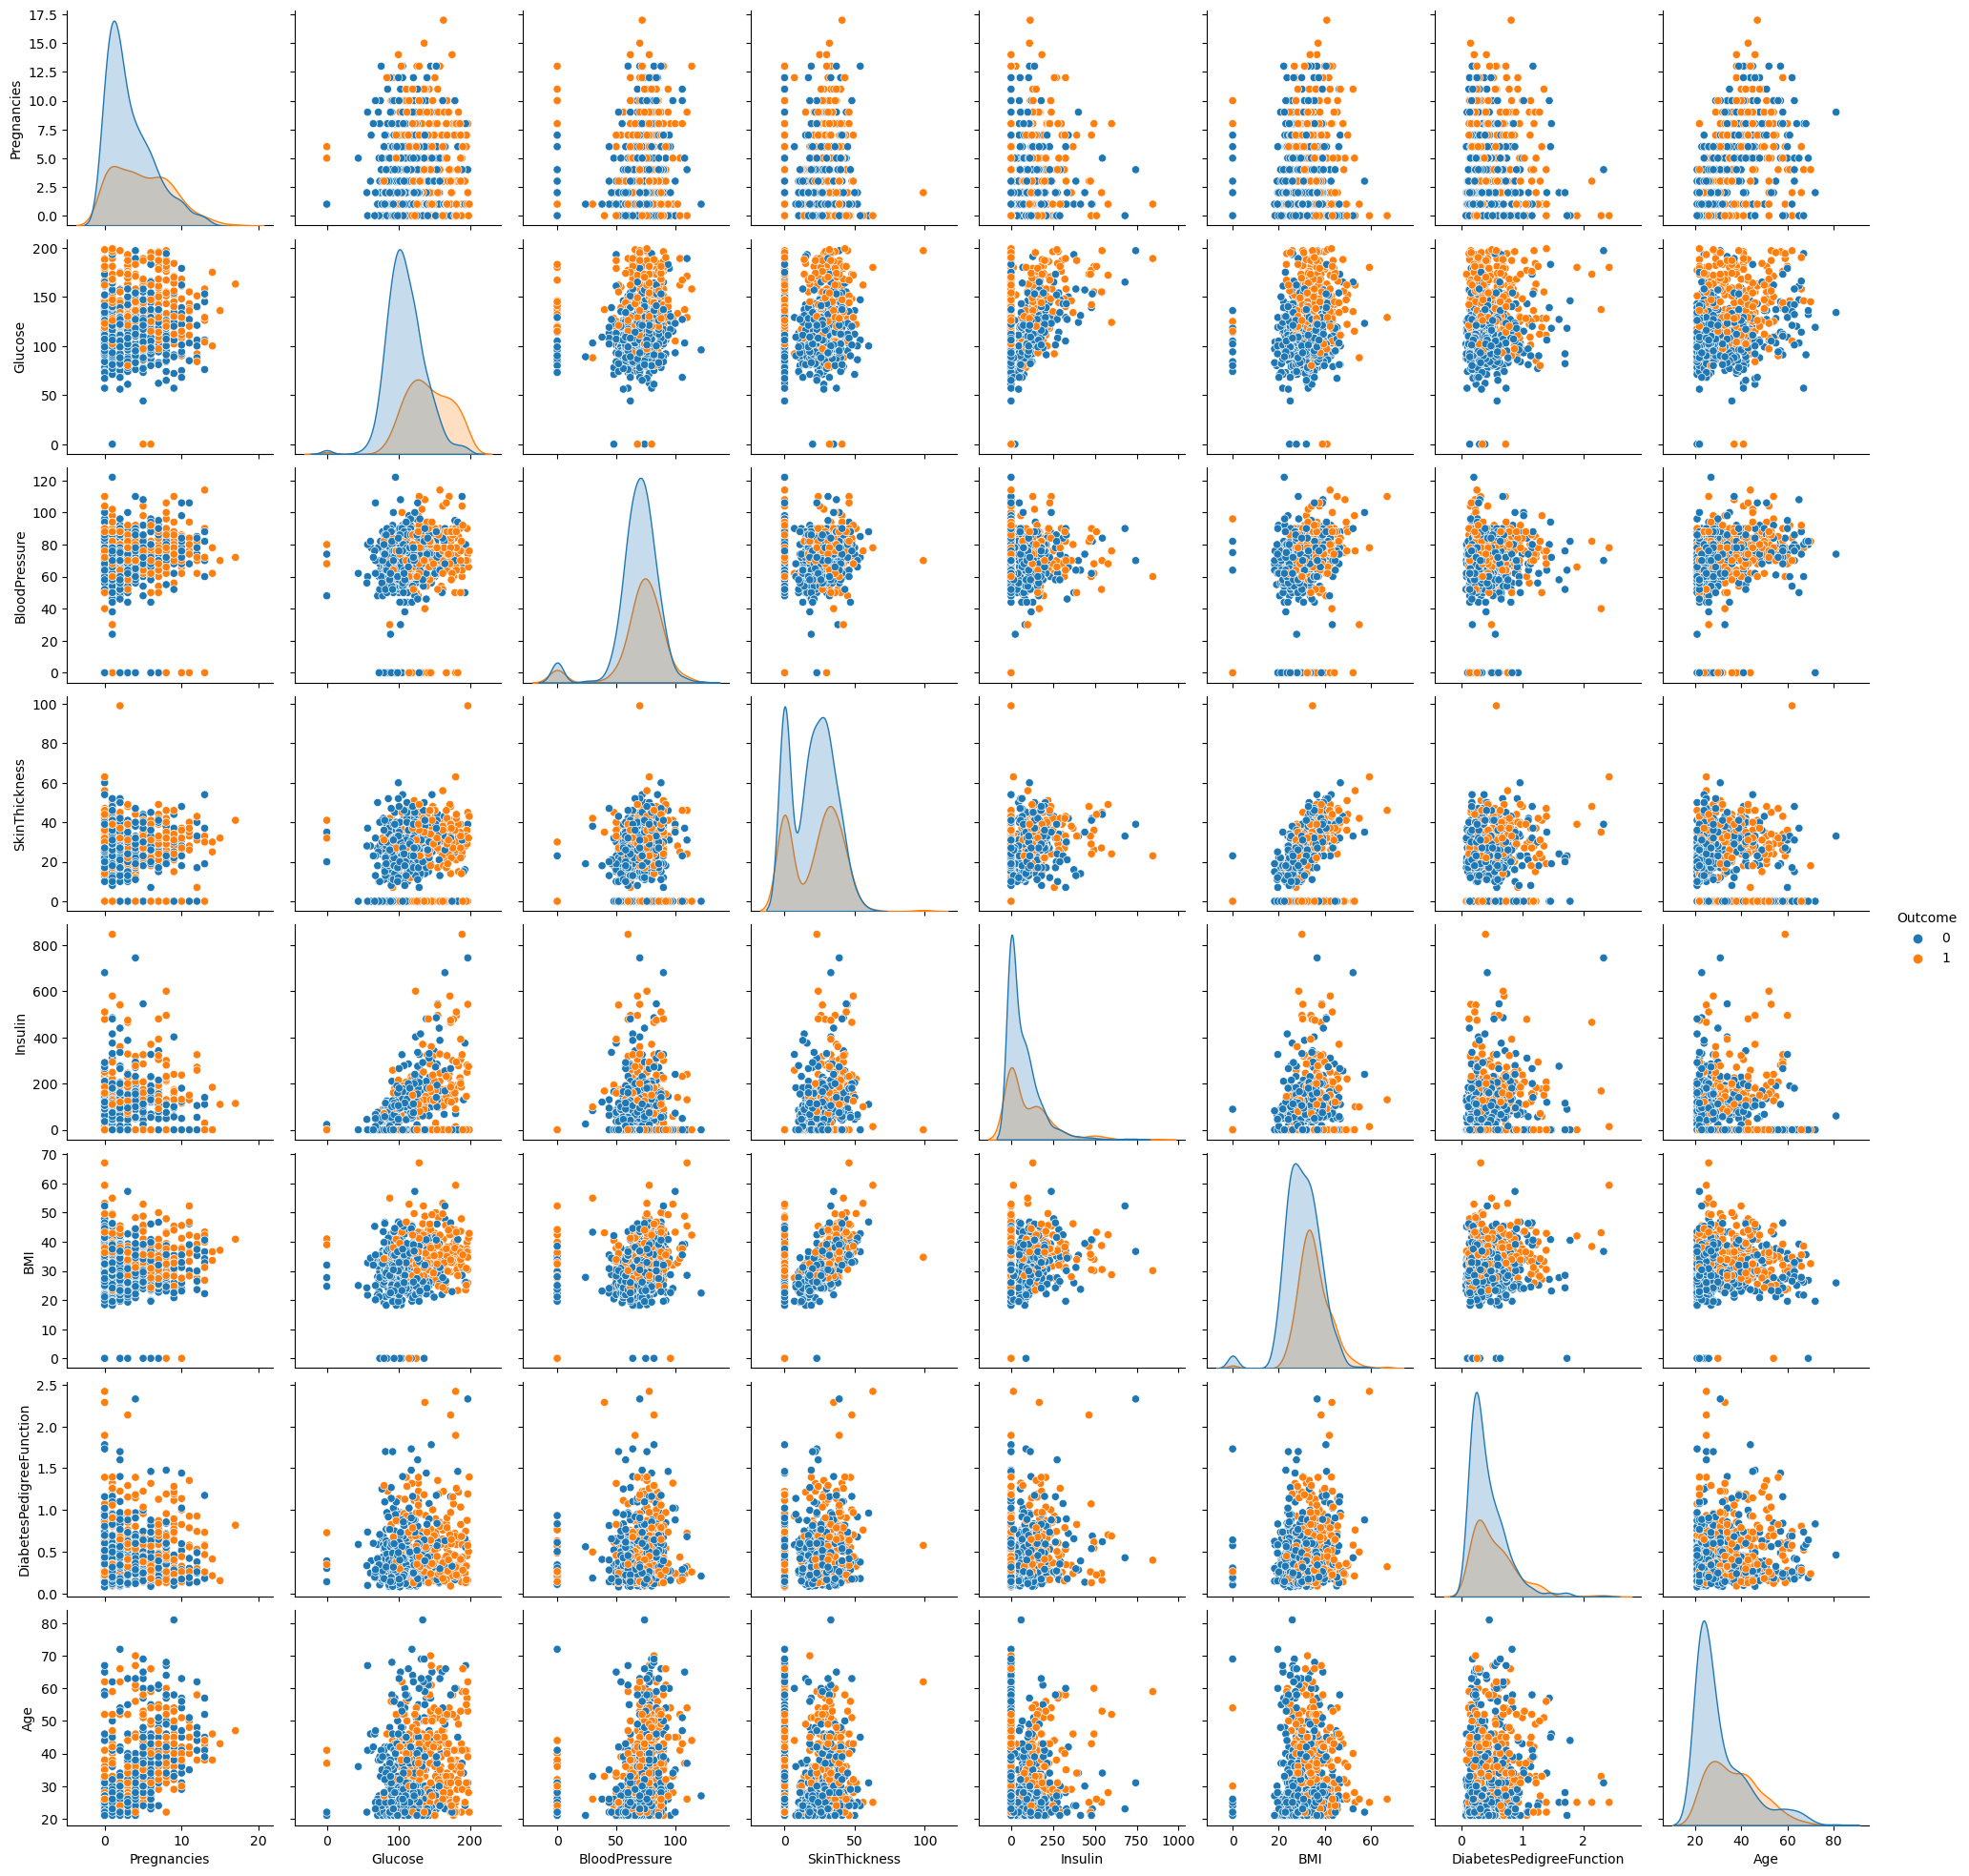

In [6]:
sns.pairplot(data=data,hue="Outcome")

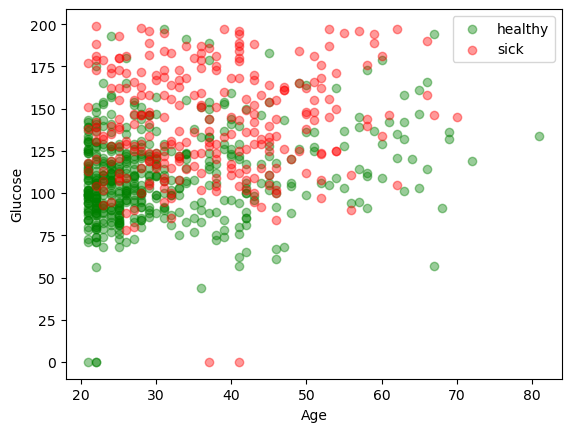

In [17]:
data2=data.copy()
data2=data2.drop("Outcome",axis=1)

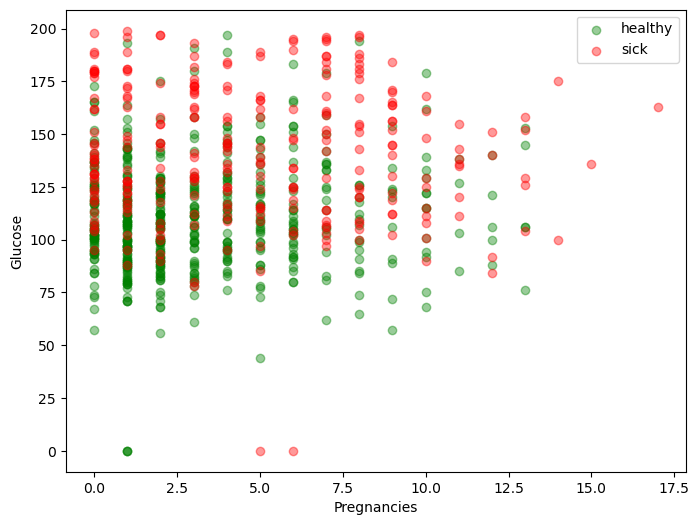

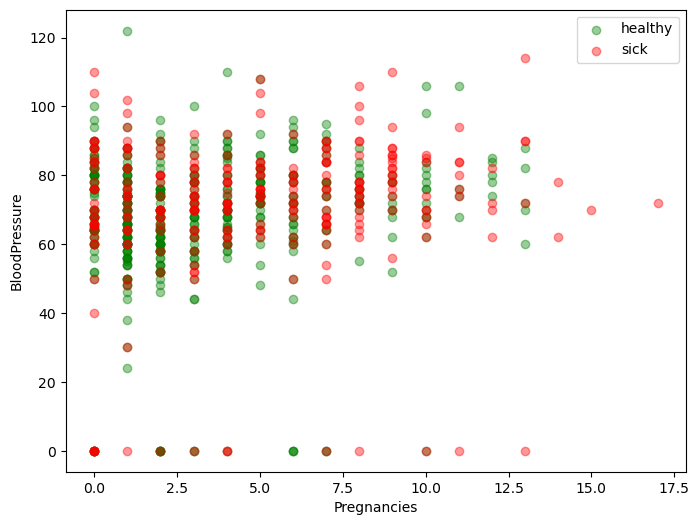

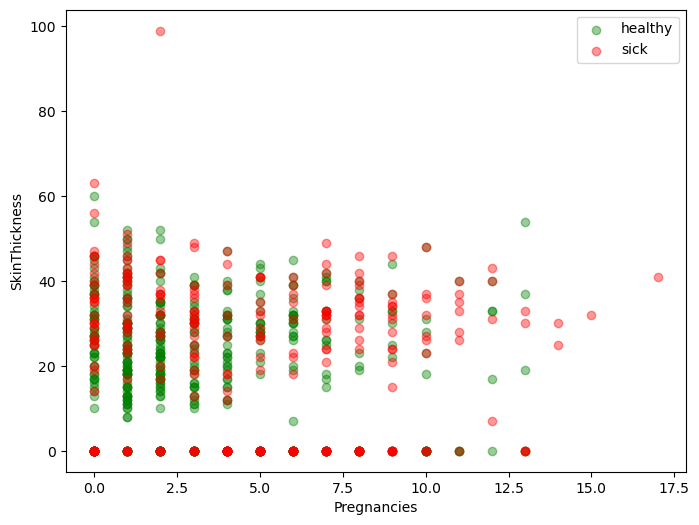

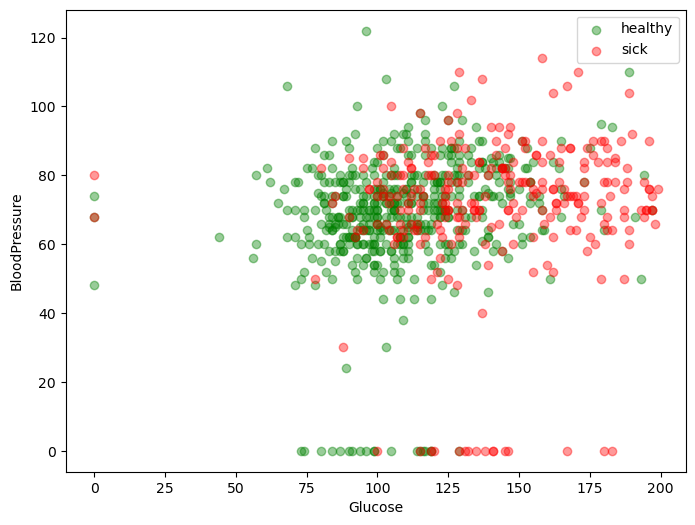

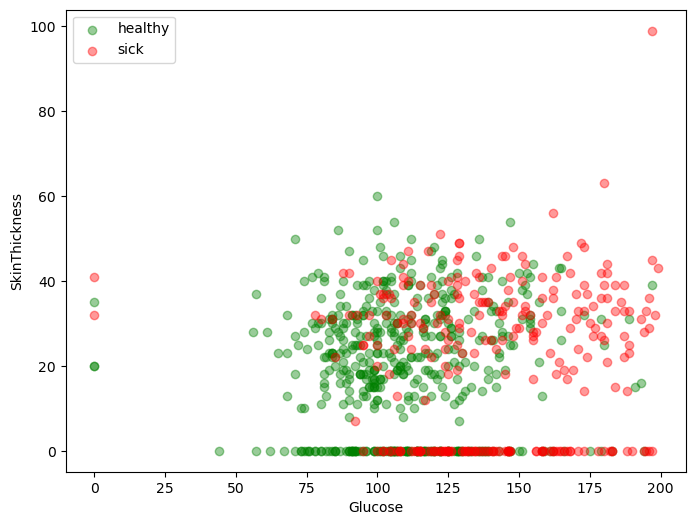

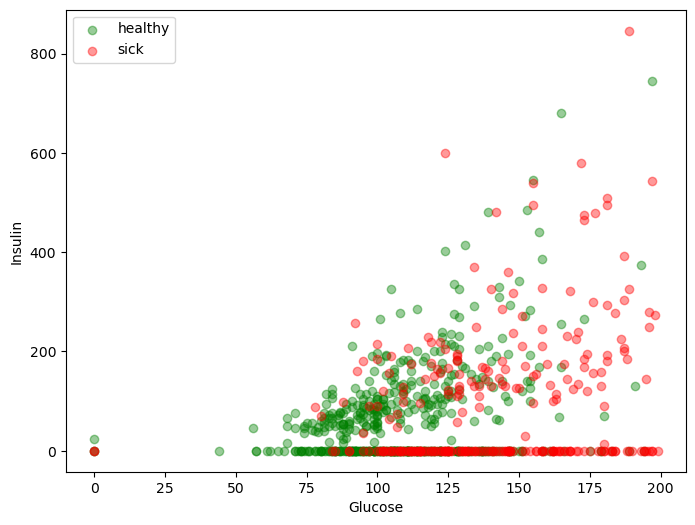

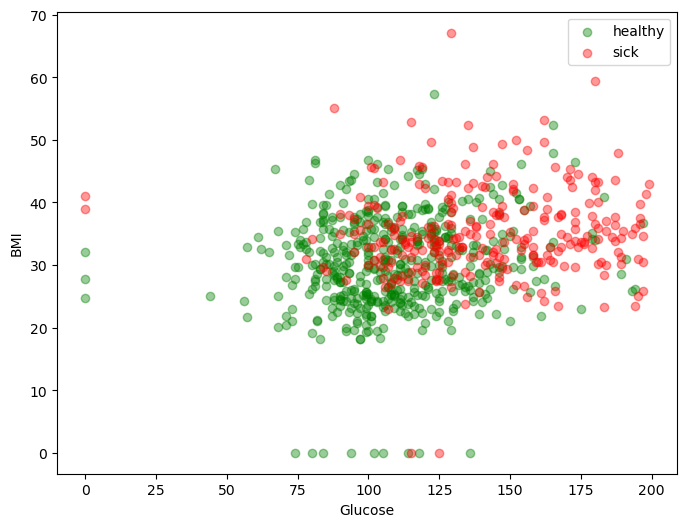

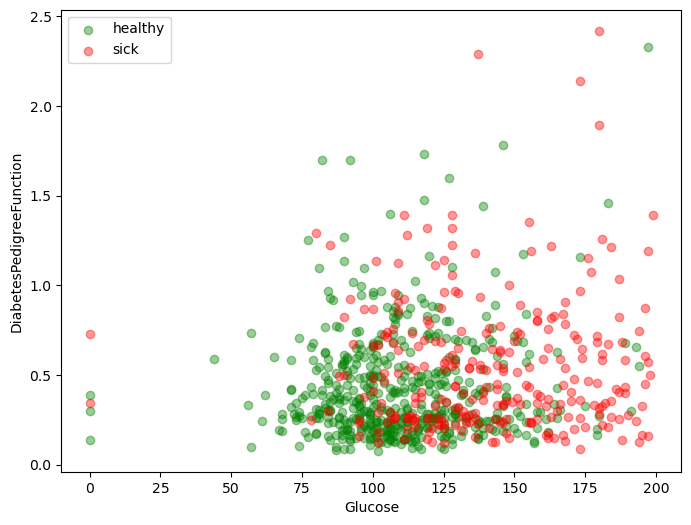

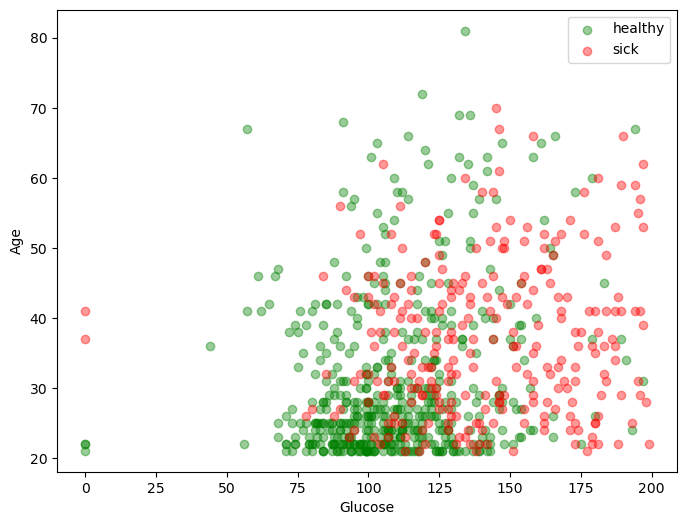

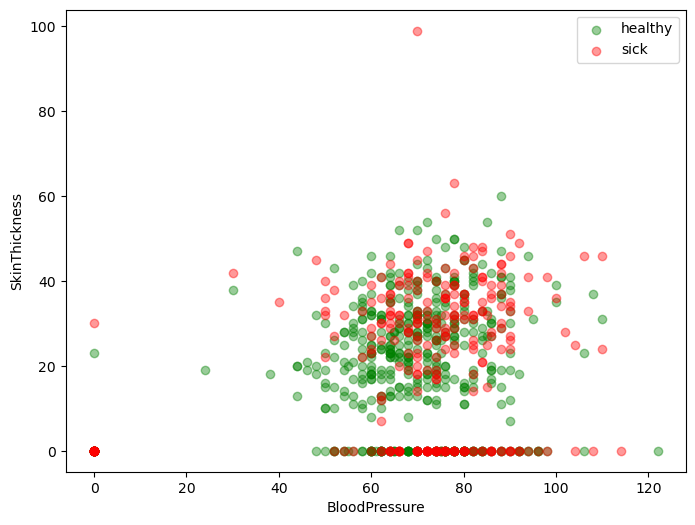

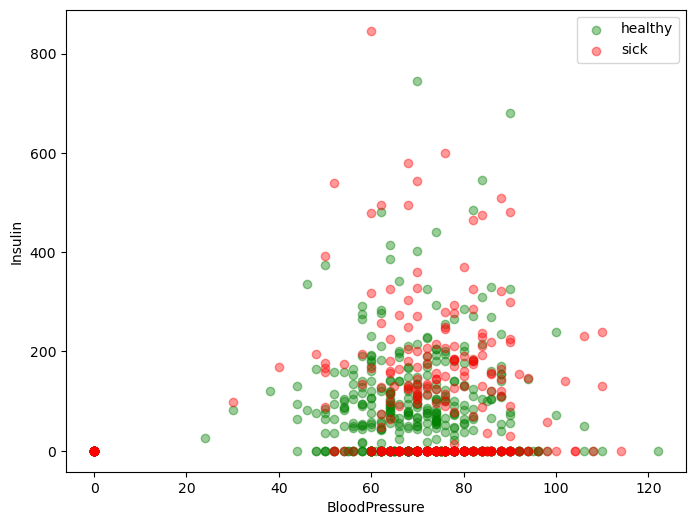

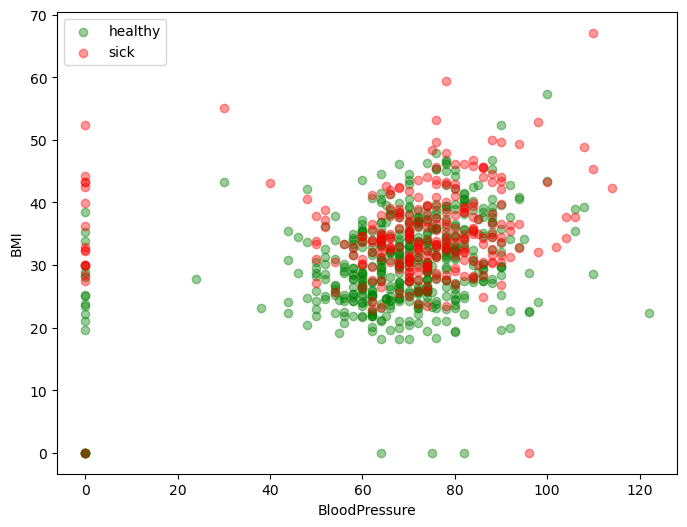

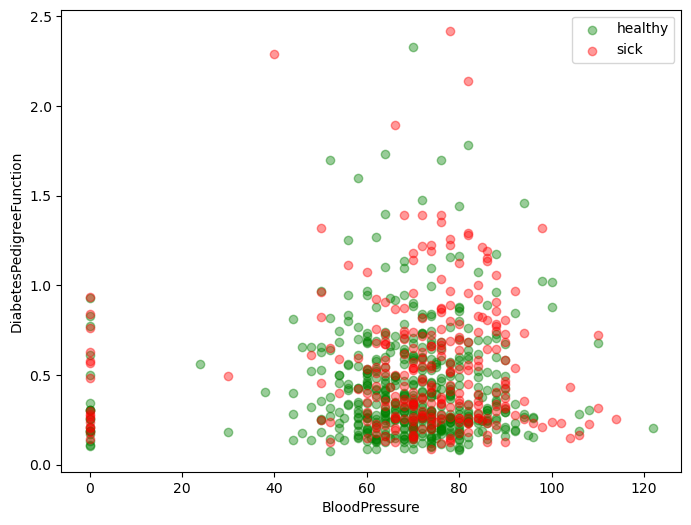

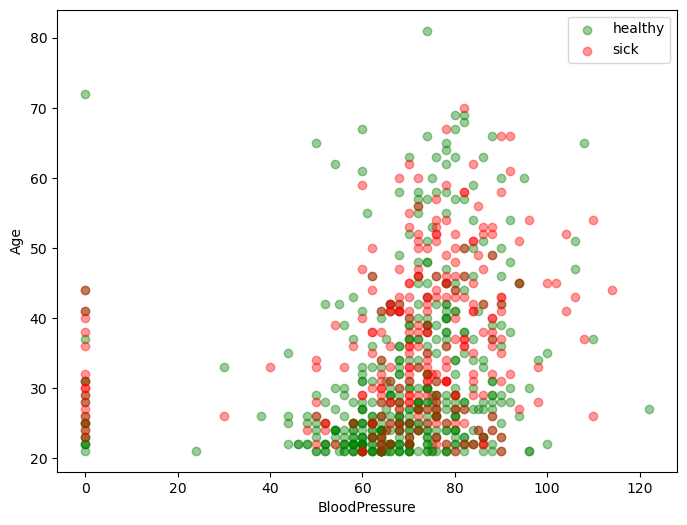

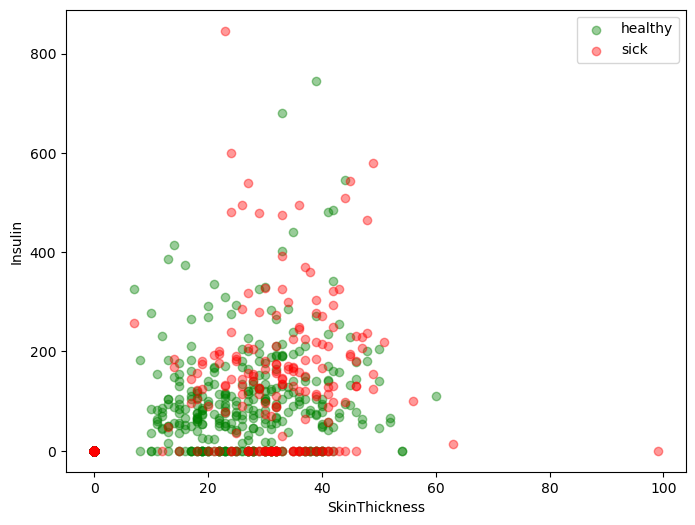

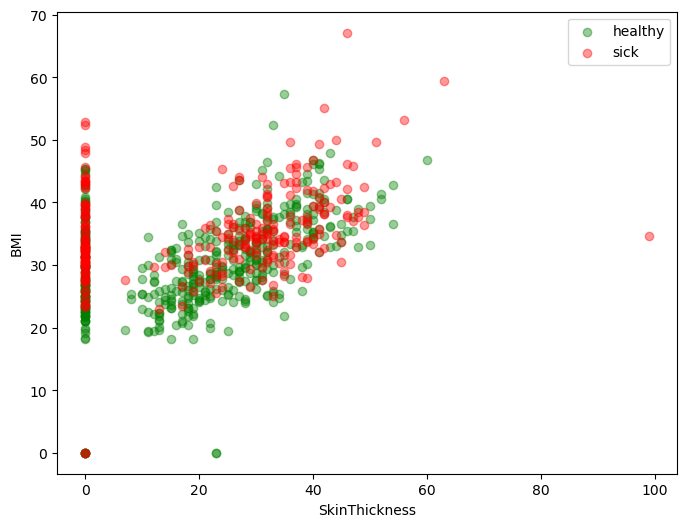

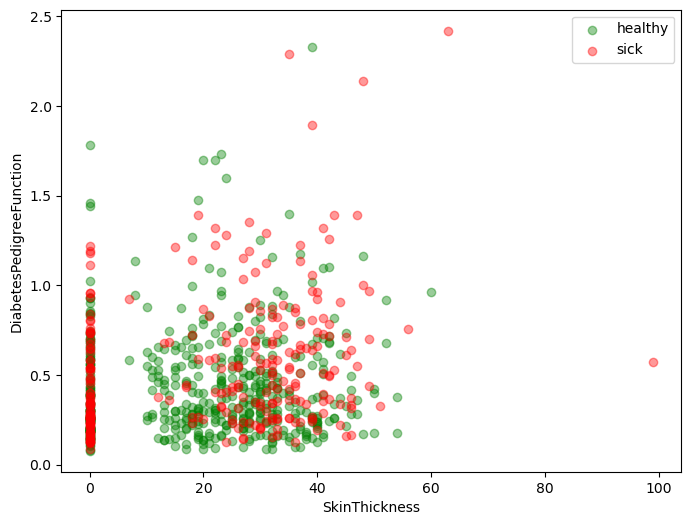

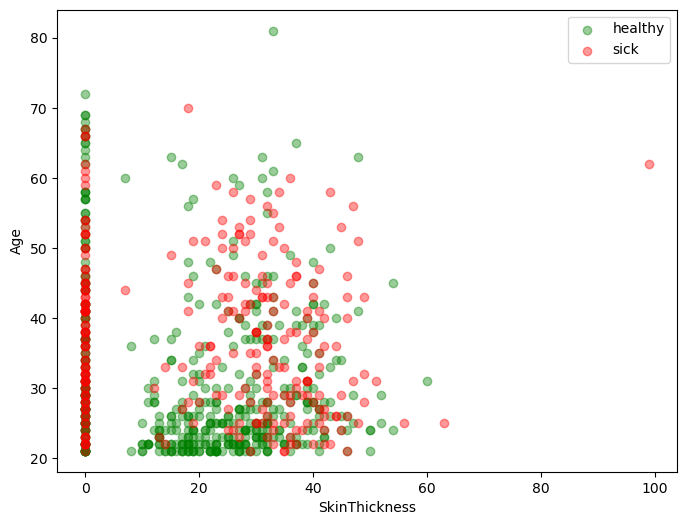

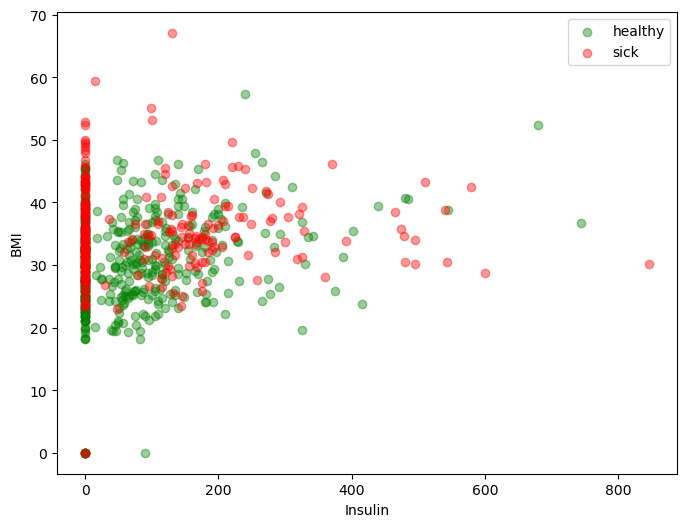

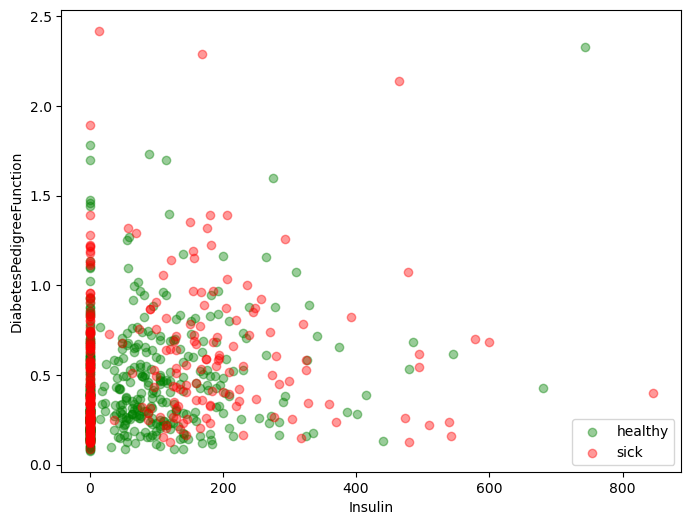

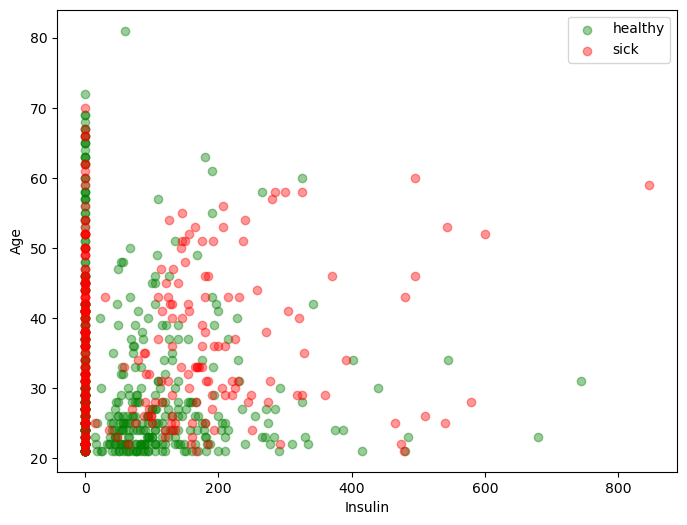

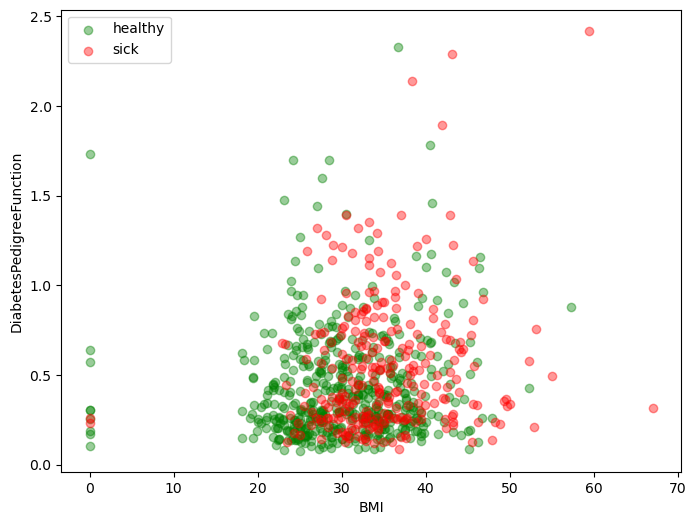

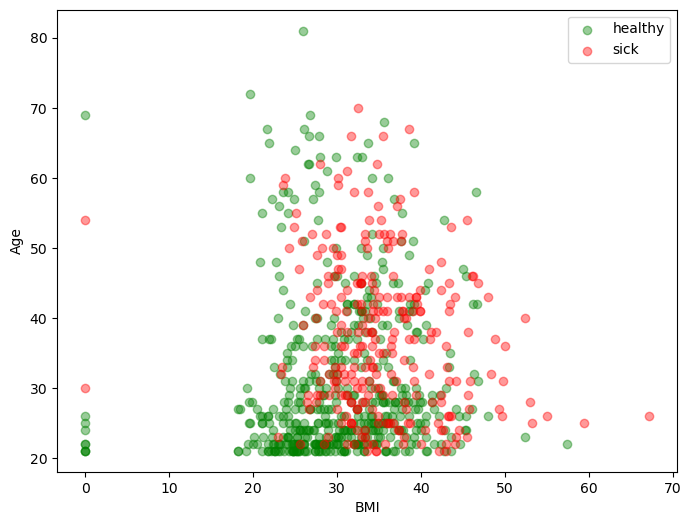

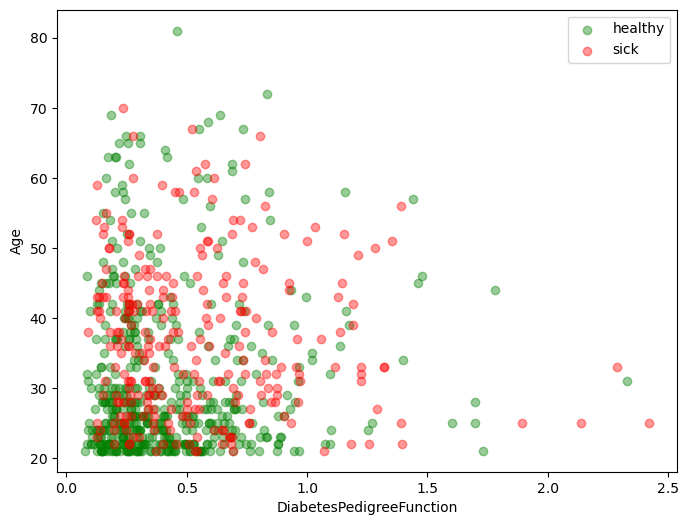

In [19]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_combinations(data2):
    columns = data2.columns
    num_columns = len(columns)

    plotted_combinations = set()

    for i in range(num_columns):
        for j in range(i + 1, num_columns):
            column1 = columns[i]
            column2 = columns[j]

            if (column1, column2) not in plotted_combinations and (column2, column1) not in plotted_combinations:
                plt.figure(figsize=(8, 6))
                plt.scatter(data2[column1][data.Outcome == 0], data2[column2][data.Outcome == 0], color="green", label="healthy", alpha=0.4)
                plt.scatter(data2[column1][data.Outcome == 1], data2[column2][data.Outcome == 1], color="red", label="sick", alpha=0.4)
                plt.xlabel(column1)
                plt.ylabel(column2)
                plt.legend()
                plt.show()

                plotted_combinations.add((column1, column2))


plot_combinations(data2)


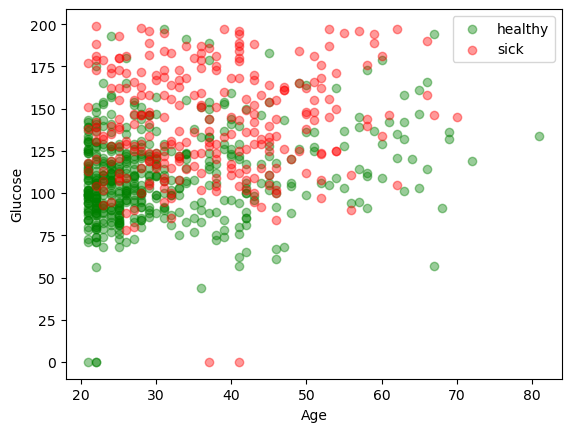

In [20]:
sick=data[data.Outcome==1]
healthy=data[data.Outcome==0]
plt.scatter(healthy.Age,healthy.Glucose,color="green",label="healthy",alpha=0.4)
plt.scatter(sick.Age,sick.Glucose,color="red",label="sick",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [21]:
y=data.Outcome.values
x=data.drop(["Outcome"],axis=1)

In [24]:
X=(x-np.min(x))/(np.max(x)-np.min(x))
X.head()

c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.10,random_state=2)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("K=3 ==> acc: ",knn.score(x_test,y_test))


K=3 ==> acc:  0.7402597402597403


In [31]:
count=1
for k in range(1,11):
    knn_new=KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(x_train,y_train)
    print(count," acc: ",knn_new.score(x_test,y_test))
    count+=1
    

1  acc:  0.7922077922077922
2  acc:  0.8051948051948052
3  acc:  0.7402597402597403
4  acc:  0.7662337662337663
5  acc:  0.7142857142857143
6  acc:  0.7662337662337663
7  acc:  0.7532467532467533
8  acc:  0.7792207792207793
9  acc:  0.7792207792207793
10  acc:  0.7792207792207793


In [32]:
knn3=KNeighborsClassifier(n_neighbors=2)
knn3.fit(x_train,y_train)
pred=knn3.predict(x_test)
print("K=2 ==> acc: ",knn3.score(x_test,y_test))

K=2 ==> acc:  0.8051948051948052
